# [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skojaku/adv-net-sci/blob/main/notebooks/exercise-m08-embedding.ipynb)


# M09: Embedding


## Data

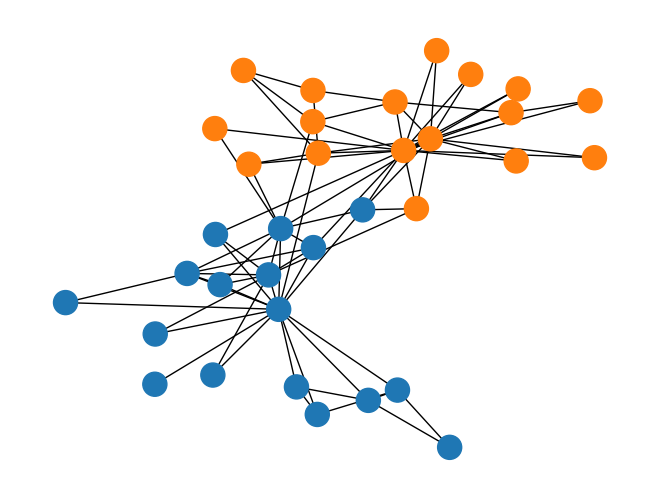

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Create a small example network
G = nx.karate_club_graph()
A = nx.adjacency_matrix(G).toarray()
labels = np.unique([d[1]['club'] for d in G.nodes(data=True)], return_inverse=True)[1]
cmap = sns.color_palette()
nx.draw(G, with_labels=False, node_color=[cmap[i] for i in labels])

# Section 1: Compute the eigenvectors and eigenvalues of A

To compute the eigenvectors and eigenvalues of the adjacency matrix A, we can use the `np.linalg.eig` function from NumPy.

```python
import numpy as np 
eigvals, eigvecs = np.linalg.eig(A)
```

This function returns two arrays:
- `eigvals`: An array of eigenvalues
- `eigvecs`: An array where each column is an eigenvector

To find the $d$ largest eigenvalues, we sort the eigenvectors by their corresponding eigenvalues in descending order:
```python
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
```

Now you have the eigenvectors and eigenvalues of A, which can be used for spectral embedding.


In [2]:
# Compute the spectral decomposition
eigvals, eigvecs = np.linalg.eig(A)

# Find the top d eigenvectors
d = 2
sorted_indices = np.argsort(eigvals)[::-1][:d]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

TypeError: Invalid object type at position 0

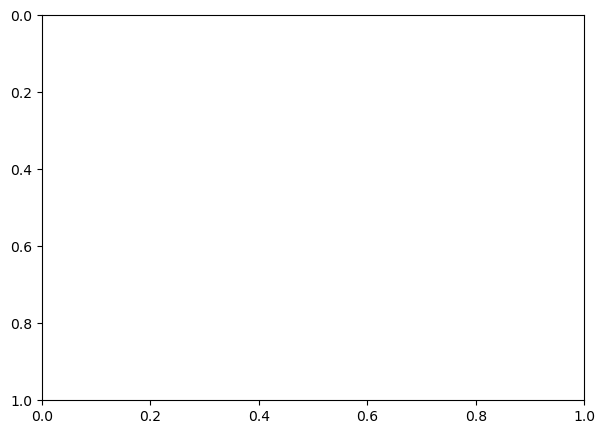

In [3]:
x = ... # set the x coordinates of the points using the first eigenvector
y = ... # set the y coordinates of the points using the second eigenvector

# Plot the results
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x = x, y = y, hue=labels, ax=ax)
ax.set_title('Spectral Embedding')
ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
plt.show()

# Section 2: Compute the Laplacian matrix and its eigenvectors

1. Define the Laplacian matrix as


$$
\mathbf{L} = \begin{bmatrix}
k_1 & -A_{12} & \cdots & -A_{1n} \\
-A_{21} & k_2 & \cdots & -A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
-A_{n1} & -A_{n2} & \cdots & k_n
\end{bmatrix}
$$

$$
L = D - A
$$

where $D$ is the degree matrix.

$$
D = \begin{bmatrix}
k_1 & 0 & \cdots & 0 \\
0 & k_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & k_n
\end{bmatrix}
$$

2. Compute the smallest, second smallest, and third smallest eigenvalues and their corresponding eigenvectors.

3. Confirm that the smallest eigenvector is parallel to the all-ones vector.

4. Confirm that the second smallest eigenvector is orthogonal to the all-ones vector.

5. Form a 2D embedding using the second and third smallest eigenvectors and plot it.



In [2]:
deg = np.sum(A, axis = 1).ravel()
D = np.diag(deg)

L = D - A # define the Laplacian matrix

eigvals, eigvecs = np.linalg.eig(L) # compute the eigenvalues and eigenvectors

# Find the top d eigenvectors
d = 3
sorted_indices = np.argsort(eigvals)[:d] # sort the eigenvalues in ascending order
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

In [4]:
import pandas as pd
# Confirm that the smallest eigenvector is parallel to the all-ones vector (i.e., x1.T @ np.ones(N) == 0)
N = A.shape[0]
v = np.ones(N)
v = v / np.linalg.norm(v)

pd.DataFrame({"eigvec": eigvecs[:, 0], "v": v})

,eigvec,v
0,0.171499,0.171499
1,0.171499,0.171499
2,0.171499,0.171499
3,0.171499,0.171499
4,0.171499,0.171499
5,0.171499,0.171499
6,0.171499,0.171499
7,0.171499,0.171499
8,0.171499,0.171499
9,0.171499,0.171499


In [6]:
# Confirm that the second smallest eigenvector is orthogonal to the all-ones vector (i.e., x2.T @ x1 = 0)
eigvecs[:, 1].T @ v

5.000586859961432e-16

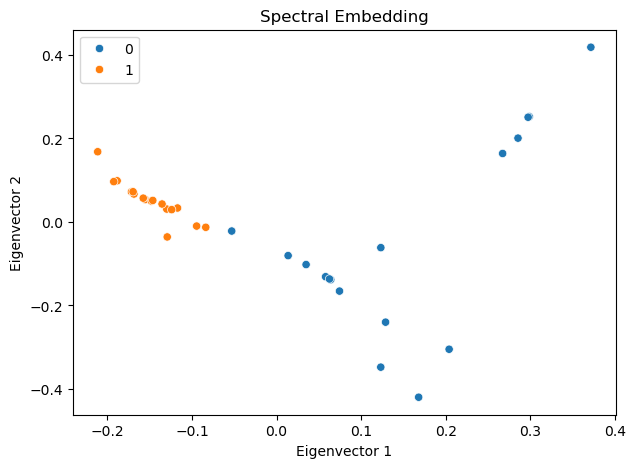

In [8]:
x = eigvecs[:, 1] # set the x coordinates of the points using the first eigenvector
y = eigvecs[:, 2] # set the y coordinates of the points using the second eigenvector

# Plot the results
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x = x, y = y, hue=labels, ax=ax)
ax.set_title('Spectral Embedding')
ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
plt.show()

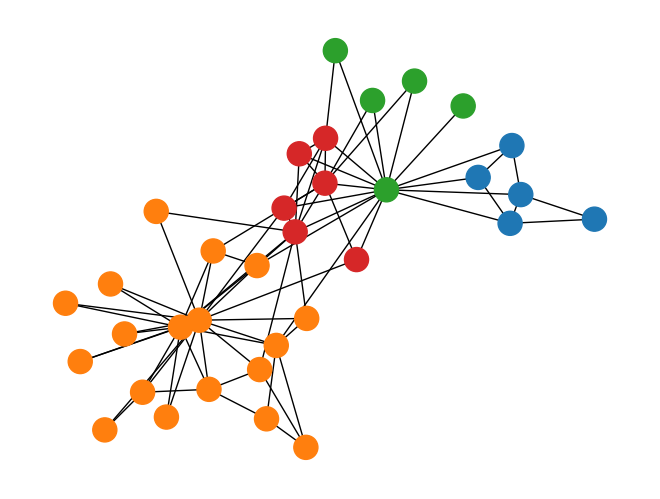

In [20]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=4, n_init = 100)
#kmeans.fit(eigvecs[:, 1:2])
#kmeans.labels_

cmap = sns.color_palette()
nx.draw(G, with_labels=False, node_color=[cmap[i] for i in kmeans.labels_])
#sns.scatterplot(x = x, y = y, hue=kmeans.labels_, palette = cmap)


# Section 3: Generate an embedding based on the normalized cut

1. Express the normalized cut objective function in terms of vector $x$ and a matrix $M$ (Hint: $M$ is something we already learned) 

2. Compute the eigenvectors and eigenvalues of $M$ 

3. Form a 2D embedding and plot it.

# Section 4: Modularity-based embedding

1. Compute the modularity matrix $Q$

2. Compute the eigenvectors and eigenvalues of $Q$

3. Form a 2D embedding and plot it.

# Section 5: Word2Vec

In [4]:
import gensim
import gensim.downloader
from gensim.models import Word2Vec

# Load pre-trained word2vec model from Google News
# Load a smaller pre-trained model for faster loading
import urllib.request
import os

# Download the model if it doesn't exist
model_path = "GoogleNews-vectors-negative300-SLIM.bin.gz"
if not os.path.exists(model_path):
    url = "https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz"
    print("Downloading model...")
    urllib.request.urlretrieve(url, model_path)
    print("Download complete")

# Load the model using gensim
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)
#model = gensim.downloader.load('word2vec-google-news-300')  # Higher quality 300-dim embeddings trained on Google News

In [8]:
# Example usage
word = "bank"
similar_words = model.most_similar(word)
print(f"Words most similar to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

Words most similar to 'bank':
banks: 0.7441
banking: 0.6902
Bank: 0.6699
lender: 0.6342
banker: 0.6093
depositors: 0.6032
depositor: 0.5716
BofA: 0.5715
Citibank: 0.5590
branch: 0.5431


A cool (yet controversial) application of word embeddings is analogy solving. Let us consider the following puzzle:

> man is to woman as king is to ___ ?

In [15]:
# We solve the puzzle by
#
#  vec(king) - vec(man) + vec(woman)
#
# To solve this, we use the model.most_similar function, with positive words being "king" and "woman" (additive), and negative words being "man" (subtractive).
#
model.most_similar(positive=['usd', "us"], negative=['usa'], topn=5)

[('banks', 0.5835295915603638),
 ('banking', 0.5280441641807556),
 ('Bank', 0.490234375),
 ('lender', 0.45974066853523254),
 ('depositors', 0.4516723155975342)]

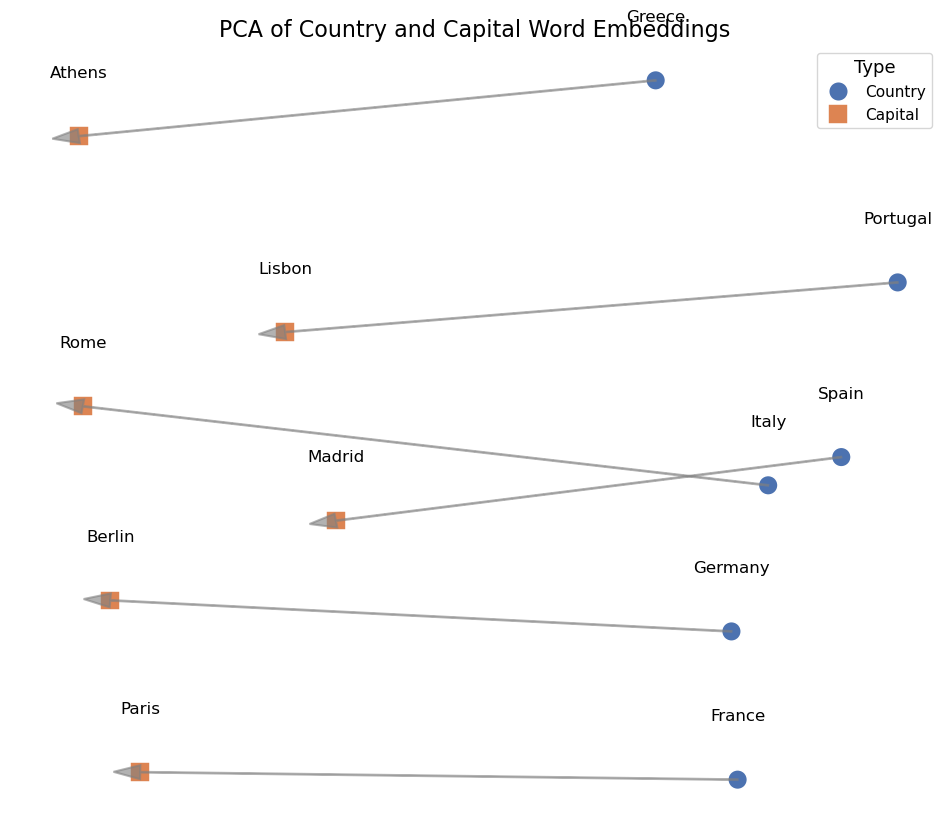

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

word_group_A = ['Germany', 'France', 'Italy', 'Spain', 'Portugal', 'Greece']
word_group_B = ['Berlin', 'Paris', 'Rome', 'Madrid', 'Lisbon', 'Athens']

# Get the word embeddings for the countries and capitals
country_embeddings = np.array([model[country] for country in word_group_A])
capital_embeddings = np.array([model[capital] for capital in word_group_B])

# Compute the PCA
pca = PCA(n_components=2)
embeddings = np.vstack([country_embeddings, capital_embeddings])
embeddings_pca = pca.fit_transform(embeddings)

# Create a DataFrame for seaborn
df = pd.DataFrame(embeddings_pca, columns=['PC1', 'PC2'])
df['Label'] = word_group_A + word_group_B
df['Type'] = ['Country'] * len(word_group_A) + ['Capital'] * len(word_group_B)

# Plot the data
plt.figure(figsize=(12, 10))

# Create a scatter plot with seaborn
scatter_plot = sns.scatterplot(data=df, x='PC1', y='PC2', hue='Type', style='Type', s=200, palette='deep', markers=['o', 's'])

# Annotate the points
for i in range(len(df)):
    plt.text(df['PC1'][i], df['PC2'][i] + 0.08, df['Label'][i], fontsize=12, ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Draw arrows between countries and capitals
for i in range(len(word_group_A)):
    plt.arrow(df['PC1'][i], df['PC2'][i], df['PC1'][i + len(word_group_A)] - df['PC1'][i], df['PC2'][i + len(word_group_A)] - df['PC2'][i],
              color='gray', alpha=0.6, linewidth=1.5, head_width=0.02, head_length=0.03)

plt.legend(title='Type', title_fontsize='13', fontsize='11')
plt.title('PCA of Country and Capital Word Embeddings', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
ax = plt.gca()
ax.set_axis_off()


# Section 6: 

## Preparation: DeepWalk

Let us implement DeepWalk from scratch based on the following steps:

1. Generate random walks of length l per node
2. Feed walks to Word2Vec
3. Use skip-gram with hierarchical softmax

Let's implement the above steps in the following cell.

In [18]:
from scipy import sparse

def random_walk(net, start_node, walk_length):
    # Initialize the walk with the starting node
    walk = [start_node]

    # Continue the walk until the desired length is reached
    while len(walk) < walk_length:
        # Get the current node (the last node in the walk)
        cur = walk[-1]

        # Get the neighbors of the current node
        cur_nbrs = list(net[cur].indices)

        # If the current node has neighbors, randomly choose one and add it to the walk
        if len(cur_nbrs) > 0:
            walk.append(np.random.choice(cur_nbrs))
        else:
            # If the current node has no neighbors, terminate the walk
            break

    # Return the generated walk
    return walk
# Test the random walk function
A = sparse.csr_matrix(A)
random_walk(A, 0, 5) # should return a list of 5 nodes starting from node 0

[0, 7, 3, 1, 7]

In [19]:
n_nodes = A.shape[0]
n_walkers_per_node = 10
walk_length = 50
walks = []
for i in range(n_nodes):
    for _ in range(n_walkers_per_node):
        walks.append(random_walk(A, i, walk_length))

Then, we feed the random walks to the word2vec model.

In [20]:
from gensim.models import Word2Vec

model = Word2Vec(walks, vector_size=32, window=3, min_count=1, sg=1, hs = 1)


Here,

- `vector_size` is the dimension of the embedding vectors.
- `window` indicates the maximum distance between a word and its context words. For example, in the random walk `[0, 1, 2, 3, 4, 5, 6, 7]`, the context words of node 2 are `[0, 1, 3, 4, 5]` when `window=3`.
- `min_count` is the minimum number of times a word must appear in the training data to be included in the vocabulary.

Two parameters `sg=1` and `hs=1` indicate that we are using the skip-gram model with negative sampling. If you are interested in the details, please refer to the lecture note. 

Let's get the embeddings of the nodes.

In [21]:
embedding = []
for i in range(n_nodes):
    embedding.append(model.wv[i])
embedding = np.array(embedding)
embedding[:3]

array([[-0.05545191, -0.42901427,  0.24649484,  0.13306676,  0.09639707,
        -0.21603544,  0.11845483, -0.10478665, -0.05704312,  0.30258703,
         0.06837583, -0.00885581,  0.09231511, -0.21058275, -0.40826172,
         0.06995657,  0.29884142,  0.11168293, -0.12338932,  0.03559665,
         0.24844691,  0.29116905,  0.69292647,  0.09116557,  0.32468185,
        -0.04194829, -0.2337593 ,  0.3895734 ,  0.02857252, -0.02304184,
        -0.40346804,  0.13057746],
       [ 0.04432854, -0.12891228,  0.5724045 ,  0.06230542,  0.05612494,
        -0.30836785,  0.0448039 , -0.01246764, -0.03431055,  0.23670527,
         0.28002462,  0.07934447,  0.12062742, -0.28859374, -0.55102605,
        -0.10113665,  0.02796787,  0.2566071 , -0.09430668,  0.02980081,
         0.29786143,  0.17493448,  0.59536093, -0.06953087,  0.11638314,
         0.02960372, -0.2590652 ,  0.41735557,  0.00214731,  0.09447684,
        -0.315615  ,  0.2430397 ],
       [-0.33263245, -0.21176894,  0.6630119 ,  0.2852

In [22]:
model

In [42]:
# ! pip install umap-learn # uncomment this if you are running this notebook on colab

In [23]:
import umap
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool


reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, metric="cosine")
xy = reducer.fit_transform(embedding)

output_notebook()

# Calculate the degree of each node
degrees = A.sum(axis=1).A1
palette = sns.color_palette().as_hex()
source = ColumnDataSource(data=dict(
    x=xy[:, 0],
    y=xy[:, 1],
    size=np.sqrt(degrees / np.max(degrees)) * 30,
    community=[palette[label] for label in labels]
))

p = figure(title="Node Embeddings from Word2Vec", x_axis_label="X", y_axis_label="Y")

p.scatter('x', 'y', size='size', source=source, line_color="black", color="community")
show(p)

/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Loading BokehJS ...

One of the interesting applications with node embeddings is clustering. While we have good community detection methods, like the modularity maximization and stochastic block model, we can use clustering methods from machine learning, such as $K$-means and Gaussian mixture model. Let's see what we can get from the node embeddings.

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the silhouette score
def Kmeans_with_silhouette(embedding, n_clusters_range=(2, 10)):
    silhouette_scores = []

    # Iterate over a range of cluster numbers from 2 to 9
    for n_clusters in range(*n_clusters_range):
        # Create a KMeans object with the current number of clusters
        kmeans = KMeans(n_clusters=n_clusters)

        # Fit the KMeans model to the embedding data
        kmeans.fit(embedding)

        # Calculate the silhouette score for the current clustering
        score = silhouette_score(embedding, kmeans.labels_)

        # Append the number of clusters and its corresponding silhouette score to the list
        silhouette_scores.append((n_clusters, score))

    # Find the number of clusters that has the highest silhouette score
    optimal_n_clusters = max(silhouette_scores, key=lambda x: x[1])[0]

    # Create a KMeans object with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_n_clusters)

    # Fit the KMeans model to the embedding data with the optimal number of clusters
    kmeans.fit(embedding)

    # Return the labels (cluster assignments) for each data point
    return kmeans.labels_

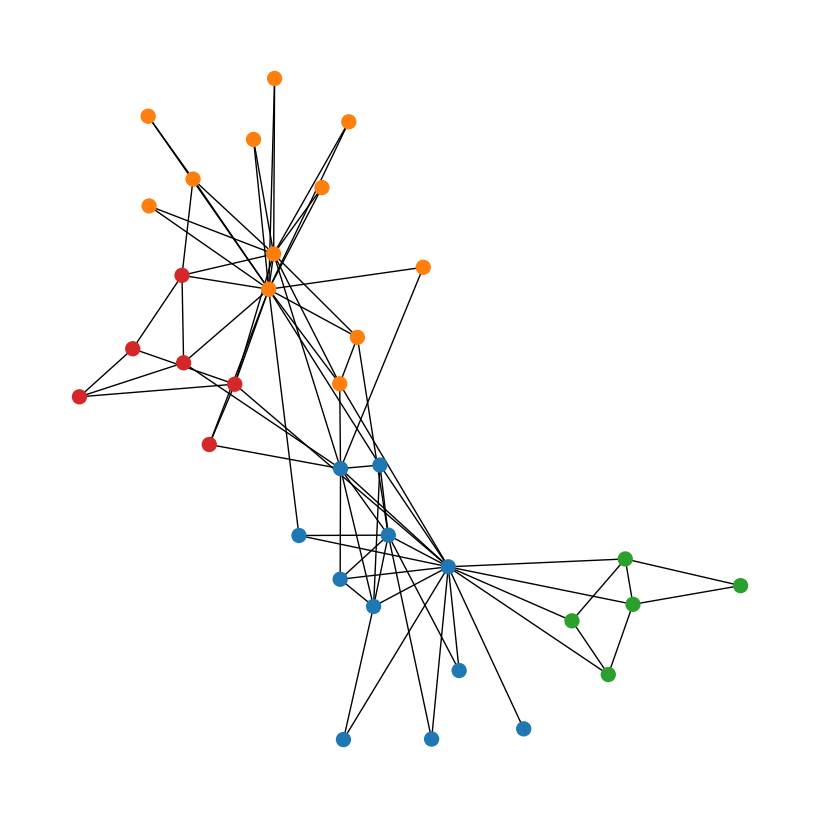

In [25]:
import seaborn as sns
detected_labels = Kmeans_with_silhouette(embedding)
cmap = sns.color_palette().as_hex()
plt.figure(figsize=(8, 8))
nx.draw(G, node_color=[cmap[label] for label in detected_labels], with_labels=False, node_size=100)
plt.show()

## Exercise: Node2Vec

Implement Node2Vec from scratch based on the following steps:

1. Generate biased random walks of length l per node
2. Feed walks to Word2Vec
3. Use skip-gram with negative sampling by setting `sg=1` and `hs=0` for the Word2Vec model.



node2vec uses biased random walks that can move in different directions. The bias walk is parameterized by two parameters, $p$ and $q$:

$$
P(v_{t+1} = x | v_t = v, v_{t-1} = t) \propto
\begin{cases}
\frac{1}{p} & \text{if } d(v,t) = 0 \\
1 & \text{if } d(v,t) = 1 \\
\frac{1}{q} & \text{if } d(v,t) = 2 \\
\end{cases}
$$

In [59]:
def node2vec_random_walk(net, start_node, walk_length, p, q):
    """
    Sample a random walk starting from start_node.
    """
    # Initialize the walk with the starting node
    walk = [start_node]

    prev = -1 # 🔥

    # Continue the walk until the desired length is reached
    while len(walk) < walk_length:
        # Get the current node (the last node in the walk)
        cur = walk[-1]

        # Get the neighbors of the current node
        cur_nbrs = list(net[cur].indices)

        # If the previous node is not set, sample a neighbor uniformly at random 🔥
        if prev == -1:
            next_node = np.random.choice(cur_nbrs)
            walk.append(next_node)
            prev = cur
            continue

        # Hint: Common neighbors with the previous node always have distance 1 🔥
        prev_nbrs = list(net[prev].indices)
        common_nbrs = list(set(cur_nbrs) & set(prev_nbrs))

        # Hint: Non-common neighbors have distance 2 🔥
        non_common_nbrs = list(set(cur_nbrs) - set(prev_nbrs))

        # Hint: Compute the probability of transitioning to each neighbor 🔥
        neighbors = [prev] + common_nbrs + non_common_nbrs
        prob = [1/p ] + [1] * len(common_nbrs) + [1/q] * len(non_common_nbrs)
        prob = np.array(prob) / sum(prob)

        # Sample the next node based on the computed probability 🔥
        next_node = np.random.choice(neighbors, p=prob)

        # Add the next node to the walk
        walk.append(next_node)

        # Update the previous node
        prev = cur

    # Return the generated walk
    return walk
# Test the random walk function
A = sparse.csr_matrix(A)
node2vec_random_walk(A, 0, 5, p = 1, q = 0.1) # should return a list of 5 nodes starting from node 0

[0, 8, 2, 27, 23]

In [63]:
walks = []
p = 0.1
q = 2

n_nodes = A.shape[0]
n_walkers_per_node = 10
walk_length = 50
walks = []
for i in range(n_nodes):
    for _ in range(n_walkers_per_node):
        walks.append(node2vec_random_walk(A, i, walk_length, p, q))

# Your code to train the Word2Vec model
from gensim.models import Word2Vec

model = Word2Vec(walks, vector_size=32, window=3, min_count=1, sg=1, hs = 1)

embedding = []
for i in range(n_nodes):
    embedding.append(model.wv[i])
embedding = np.array(embedding)

Plot the node embeddings using UMAP.

In [64]:
import umap
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool


reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, metric="cosine")
xy = reducer.fit_transform(embedding)

output_notebook()

# Calculate the degree of each node
degrees = A.sum(axis=1).A1
palette = sns.color_palette().as_hex()
source = ColumnDataSource(data=dict(
    x=xy[:, 0],
    y=xy[:, 1],
    size=np.sqrt(degrees / np.max(degrees)) * 30,
    community=[palette[label] for label in labels]
))

p = figure(title="Node Embeddings from Word2Vec", x_axis_label="X", y_axis_label="Y")

p.scatter('x', 'y', size='size', source=source, line_color="black", color="community")
show(p)

/Users/skojaku-admin/miniforge3/envs/advnetsci/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Loading BokehJS ...

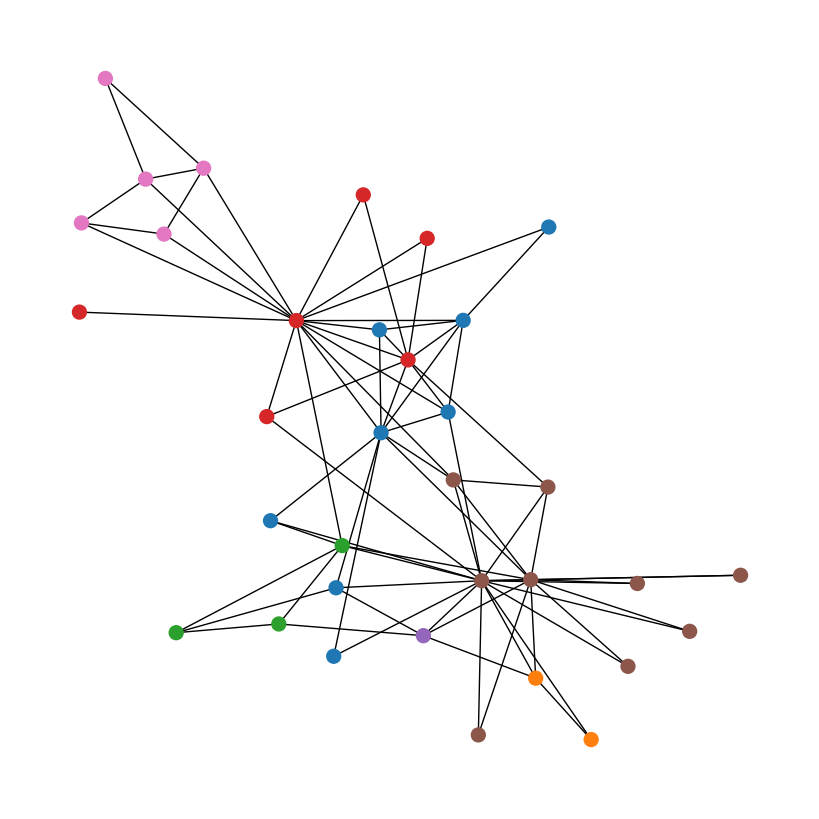

In [65]:
import seaborn as sns
detected_labels = Kmeans_with_silhouette(embedding)
cmap = sns.color_palette().as_hex()
plt.figure(figsize=(8, 8))
nx.draw(G, node_color=[cmap[label] for label in detected_labels], with_labels=False, node_size=100)
plt.show()